# Medical Data Visualizer

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(".\medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Modifying data

Adding an overweight column

In [5]:
BMI = df['weight'] / ((df['height']/100)**2)
isOverweight = []
for i in BMI:
    if i > 25:
        isOverweight.append(1)
    else:
        isOverweight.append(0)
df['overweight'] = isOverweight
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalizing the data by making 0 always good and 1 always bad

In [6]:
norm_df = df.copy()
norm_df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [7]:
# Normalizing active column
norm_df['active'] = 1- norm_df['active']

In [8]:
# Normalizing cholesterol and glucose
norm_df['gluc'] = np.where(norm_df['gluc'] == 1,0,1)
norm_df['cholesterol'] = np.where(norm_df['cholesterol'] == 1,0,1)
norm_df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,0,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,0,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,1,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,0,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,1,0,0


Converting data into long format and creating a chart that shows the value counts of the categorical features

In [9]:
# Converting data into long format
long_df = pd.melt(norm_df, value_vars = ['cholesterol','gluc','smoke','alco','active','overweight'])
long_df = pd.melt(norm_df,id_vars = 'cardio', value_vars = ['cholesterol','gluc','smoke','alco','active','overweight'])
long_df = pd.DataFrame(data = long_df.value_counts(), columns = ['total']).sort_index().reset_index()
long_df.head()

,cardio,variable,value,total
0,0,active,0,28643
1,0,active,1,6378
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


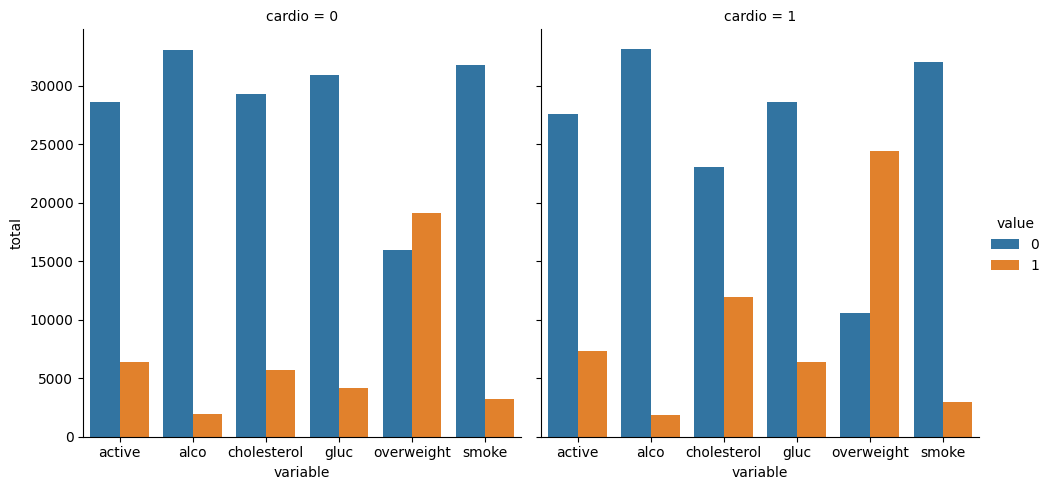

In [10]:
# Creating a chart
sns.catplot(long_df,x = 'variable', y = 'total', hue = 'value', col = 'cardio', kind = 'bar')

### Cleaning data
Filter out the following patient segments that represent incorrect data:

##### diastolic pressure is higher than systolic

In [11]:
norm_df = norm_df[norm_df['ap_lo'] <= norm_df['ap_hi']]
norm_df.shape

(68766, 14)

##### height is less than the 2.5th percentile

In [12]:
norm_df = norm_df[norm_df['height'] >= norm_df['height'].quantile(0.025)]
norm_df.shape

(67260, 14)

##### height is more than the 97.5th percentile

In [13]:
norm_df = norm_df[norm_df['height'] <= norm_df['height'].quantile(0.975)]
norm_df.shape

(65859, 14)

##### weight is less than the 2.5th percentile

In [14]:
norm_df = norm_df[norm_df['weight'] >= norm_df['weight'].quantile(0.025)]
norm_df.shape

(64384, 14)

##### weight is more than the 97.5th percentile

In [15]:
norm_df = norm_df[norm_df['weight'] <= norm_df['weight'].quantile(0.975)]
norm_df.shape

(62784, 14)

### Creating a correlation matrix

In [28]:
corr = norm_df.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,-0.005890,0.003770,-0.000769
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,0.011471,0.239987,0.089282
sex,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,-0.007702,0.001727,-0.055146
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,0.005042,-0.025673,-0.156139
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,0.012112,0.166886,0.655764
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,0.000162,0.050321,0.016900
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,-0.002184,0.326125,0.169567
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,-0.002804,0.202257,0.126770
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,0.009629,0.088267,0.086850
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,-0.027203,-0.020605,-0.003981


In [48]:
mask = np.tril(corr, k = 0)

<AxesSubplot: >

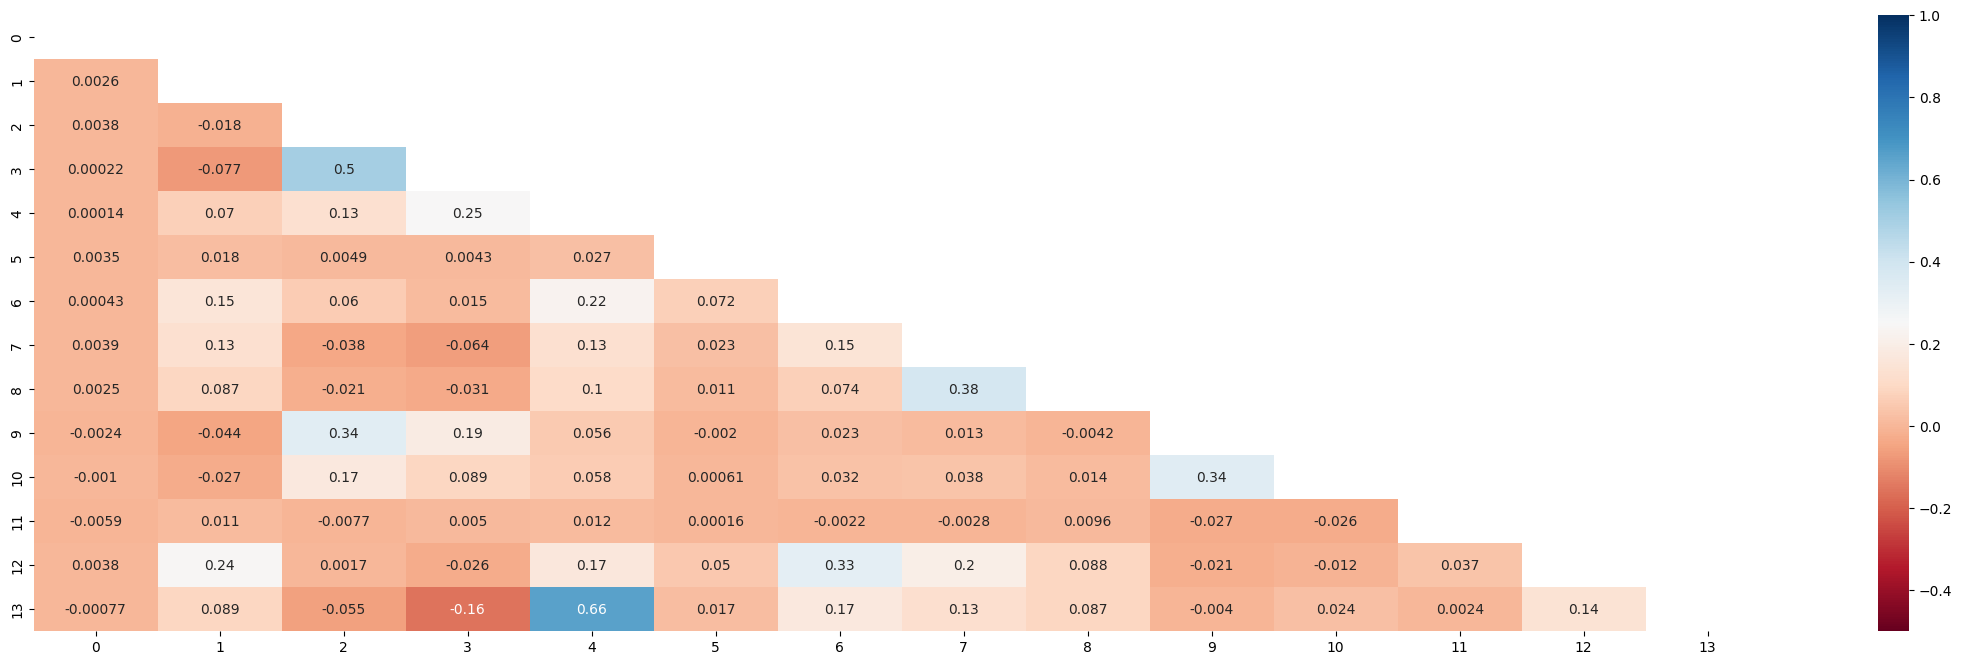

In [47]:
plt.figure(figsize=(28,8))
sns.heatmap(mask, cmap='RdBu', vmin = -0.5, vmax = 1, annot = True, mask = np.transpose(mask))